In [51]:
# workshop8b
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import utils
from tensorflow.keras import callbacks


In [52]:
data_dir = 'cats_and_dogs'

In [53]:
train_dataset, valid_dataset = utils.image_dataset_from_directory(
    data_dir,
    labels = 'inferred',
    label_mode = 'categorical',
    color_mode = 'rgb',
    image_size = (128, 128),
    batch_size = 32,
    shuffle = True,
    validation_split = 0.2,
    subset = 'both',
    seed = 0
)

Found 3000 files belonging to 2 classes.
Using 2400 files for training.
Using 600 files for validation.


In [54]:
train_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 2), dtype=tf.float32, name=None))>

In [55]:
valid_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 2), dtype=tf.float32, name=None))>

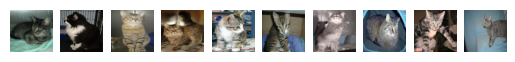

In [70]:
fig, axs = plt.subplots(1, 10)

i = 0
for batch_x, batch_y in train_dataset.as_numpy_iterator():
    for x, y in zip(batch_x, batch_y):
        if i >= 10:
            break
        if y[0] == 1:
            axs[i].imshow(x.astype(int))
            axs[i].set_axis_off()
            i += 1

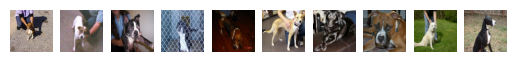

In [68]:
fig, axs = plt.subplots(1, 10)

# TODO: plot the first five images of dogs in `train_dataset` on `axs`
i = 0
for batch_x, batch_y in train_dataset.as_numpy_iterator():
    for x, y in zip(batch_x, batch_y):
        if i >= 10:
            break
        if y[0] == 0:
            axs[i].imshow(x.astype(int))
            axs[i].set_axis_off()
            i += 1

In [58]:
def build_model() -> models.Sequential:

    # TODO: complete this function; create a keras.models.Sequential() model, `model`,
    # and add some layers and then compile the model; return `model` once complete
    model = models.Sequential()
    model.add(layers.Normalization(input_shape = (128, 128, 3)))
    model.add(layers.Conv2D(8, (3, 3), activation = 'relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.1))
    model.add(layers.MaxPooling2D((2,2)))
    model.add(layers.Conv2D(16, (3, 3), activation = 'relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.1))
    model.add(layers.MaxPooling2D((2,2)))
    model.add(layers.Conv2D(32, (3, 3), activation = 'relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.1))
    model.add(layers.MaxPooling2D((2,2)))
    model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.1))
    model.add(layers.MaxPooling2D((2,2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(256, activation = 'relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(256, activation = 'relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(2, activation = 'softmax'))

    model.compile(
        optimizer = 'adam',
        loss = 'categorical_crossentropy',
        metrics = ['accuracy']
    )

    return model

In [59]:
# TODO: create a model, `model`, using the `build_model()` function
model = build_model()

In [60]:
# TODO: print a summary table for `model`
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_4 (Normaliza  (None, 128, 128, 3)       7         
 tion)                                                           
                                                                 
 conv2d_16 (Conv2D)          (None, 126, 126, 8)       224       
                                                                 
 batch_normalization_16 (Ba  (None, 126, 126, 8)       32        
 tchNormalization)                                               
                                                                 
 dropout_24 (Dropout)        (None, 126, 126, 8)       0         
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 63, 63, 8)         0         
 ng2D)                                                           
                                                      

In [71]:
# TODO: provide a path, `checkpoint_file`, to a location where the checkpoint file(s) will be saved;
# checkpoint files usually have the `.keras` extension
checkpoint_file = 'Desktop\Workshop\MLmodel.keras'

In [72]:
# TODO: add a checkpointing callback (`ModelCheckpoint`) to the callbacks list, `callbacks_`,
# and any additional callbacks 
callbacks_ = [
    callbacks.ModelCheckpoint(
        checkpoint_file,
        monitor = 'val_accuracy',
        save_best_only = True,
        save_weights_only = True,
        verbose = 1
    ),
    callbacks.EarlyStopping(
        monitor = 'val_accuracy',
        min_delta = 0.01,
        patience = 10,
        verbose = 1
    )
]

In [63]:
# TODO: fit `model`
history = model.fit(
    train_dataset,
    batch_size = 32,
    epochs = 20,
    validation_data = valid_dataset,
    shuffle = True,
    callbacks = callbacks_
)

Epoch 1/20


75/75 [==============================] - ETA: 0s - loss: 1.1379 - accuracy: 0.5533
Epoch 1: val_accuracy improved from -inf to 0.52667, saving model to Desktop\Workshop\MLmodel.keras
75/75 [==============================] - 5s 50ms/step - loss: 1.1379 - accuracy: 0.5533 - val_loss: 0.7021 - val_accuracy: 0.5267
Epoch 2/20
75/75 [==============================] - ETA: 0s - loss: 0.6994 - accuracy: 0.6037
Epoch 2: val_accuracy improved from 0.52667 to 0.65167, saving model to Desktop\Workshop\MLmodel.keras
75/75 [==============================] - 4s 47ms/step - loss: 0.6994 - accuracy: 0.6037 - val_loss: 0.6432 - val_accuracy: 0.6517
Epoch 3/20
74/75 [============================>.] - ETA: 0s - loss: 0.6538 - accuracy: 0.6385
Epoch 3: val_accuracy improved from 0.65167 to 0.66000, saving model to Desktop\Workshop\MLmodel.keras
75/75 [==============================] - 4s 48ms/step - loss: 0.6537 - accuracy: 0.6379 - val_loss: 0.6423 - val_accuracy: 0.6600
Epoch 4/20
74/75 [==

In [73]:
# TODO: load weights for `model` from `checkpoint_file`
model.load_weights(checkpoint_file)

In [74]:
# TODO: evaluate `model`
valid_loss, valid_accuracy = model.evaluate(valid_dataset)

print(f'Validation Loss: {valid_loss:.4f}')
print(f'Validation Accuracy: {(valid_accuracy * 100.0):.1f}%')

19/19 [==============================] - 0s 12ms/step - loss: 0.6798 - accuracy: 0.7433
Validation Loss: 0.6798
Validation Accuracy: 74.3%
